## CSCE5222.002 Assignment_3 <br>
The assignment 3 is the combination of ICE 9 and ICE 10. You may find something helpful in these two ICEs

## Task 1. Edge detection <br>
In task 1, you need to apply different edge detection methods to an image. Please finish<br>
1. Apply sharpening filter to the image and display the edge image;
2. Apply Sobel filter to the image and display the edge image;
3. Apply Fourier transform to the image, apply high pass filter to the frequency domain graph, then recover the image to spatial domain and display the edge image in spatial domain;
4. Apply Fourier transform to the image, extract the phase part of the image, then recover the phase part of the image to spatial domain and display the phase part of the image in spatial domain.

## Apply sharpening filter to the image and display the edge image

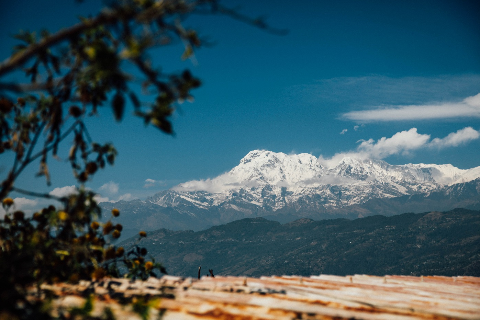

In [33]:
# write your code here

#importing libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

#Reading images
img = cv2.imread('/content/Nepal.jpg') # load an image
resize_img = cv2.resize(img, (480, 320))  
cv2_imshow(resize_img)

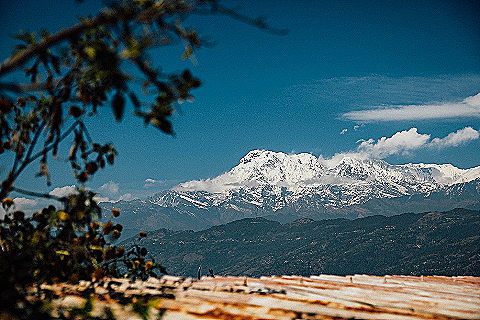

In [34]:
# sharpening image

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(src=resize_img, ddepth=-1, kernel=kernel)
cv2_imshow(image_sharp)

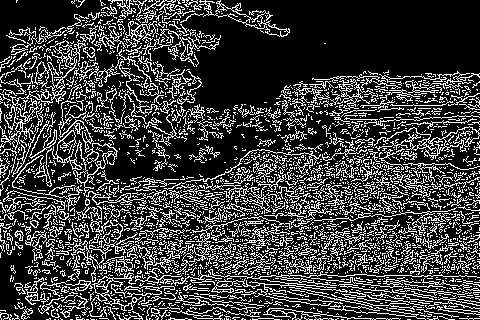

In [35]:
# getting the edge image

edges = cv2.Canny(image_sharp, 30, 100)
cv2_imshow(edges)

## Apply Sobel filter to the image and display the edge image

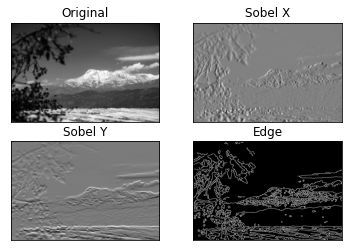

In [36]:
# Sobel Filter

#Resize image
img0 = cv2.resize(img, (480, 320))

# converting to gray scale
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)

# convolute with proper kernels
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

# getting the edge image
edges = cv2.Canny(img, 30, 100)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(edges,cmap = 'gray')
plt.title('Edge'), plt.xticks([]), plt.yticks([])

plt.show()

## Apply Fourier transform to the image, apply high pass filter to the frequency domain graph, then recover the image to spatial domain and display the edge image in spatial domain

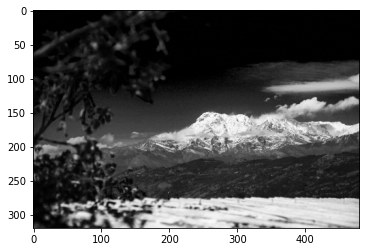

In [37]:
img1 = img0[:,:,2] # blue channel
plt.imshow(img1, cmap='gray')

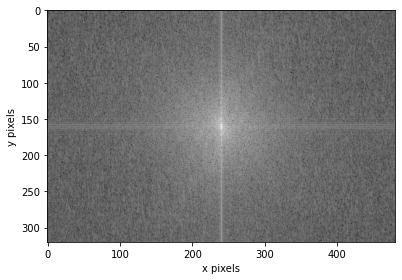

In [38]:
#Fourier Transform

f = cv2.dft(np.float32(img1), flags=cv2.DFT_COMPLEX_OUTPUT)
f_shift = np.fft.fftshift(f)
f_complex = f_shift[:,:,0] + 1j*f_shift[:,:,1]
f_abs = np.abs(f_complex) + 1 # lie between 1 and 1e6
f_bounded = 20 * np.log(f_abs)
f_img = 255 * f_bounded / np.max(f_bounded)
f_img = f_img.astype(np.uint8)
fig = plt.figure()

plt.imshow(f_img, cmap='gray')
plt.xlabel("x pixels")
plt.ylabel("y pixels")
plt.tight_layout()    #exclude margins
plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0x7f25d88f8350>,
 Text(0.5, 1.0, 'High Pass Filter'))

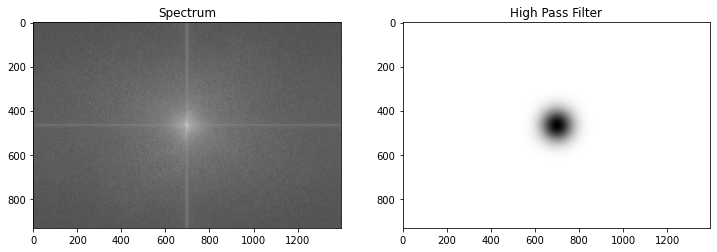

In [39]:
# Gaussian High Pass Filter

from math import sqrt,exp

def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

img = cv2.imread("/content/Nepal.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

HighPass = gaussianHP(50,img.shape)
plt.subplot(152), plt.imshow(np.abs(HighPass), "gray"), plt.title("High Pass Filter")

(<matplotlib.image.AxesImage at 0x7f25ceafd050>,
 Text(0.5, 1.0, 'Processed Image'))

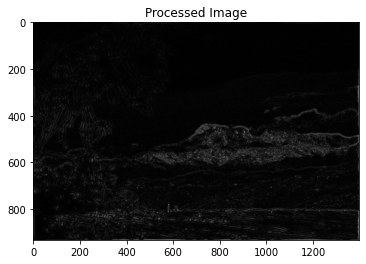

In [40]:
# Edge image in Spatial Domain

HighPassCenter = center * gaussianHP(50,img.shape)
# plt.subplot(153), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")

HighPass = np.fft.ifftshift(HighPassCenter)
# plt.subplot(154), plt.imshow(np.log(1+np.abs(HighPass)), "gray"), plt.title("Decentralize")

inverse_HighPass = np.fft.ifft2(HighPass)
plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Processed Image")

## Apply Fourier transform to the image, extract the phase part of the image, then recover the phase part of the image to spatial domain and display the phase part of the image in spatial domain.

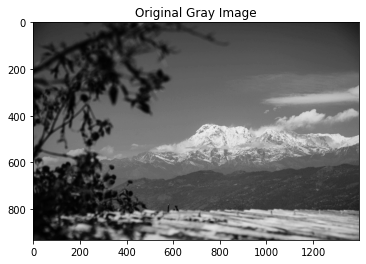

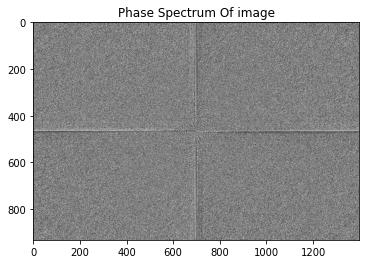

In [58]:
img=plt.imread('/content/Nepal.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
dft = np.fft.fft2(img)
dft_shift = np.fft.fftshift(dft)
phase_spectrum = np.angle(dft_shift)

plt.imshow(img, cmap='gray')
plt.title("Original Gray Image")
plt.show()

plt.imshow(phase_spectrum, cmap='gray')
plt.title("Phase Spectrum Of image")
plt.show()

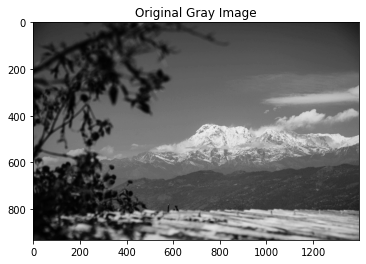

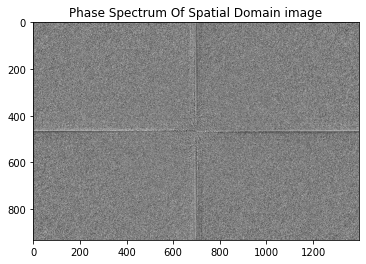

In [59]:
inverse_HighPass = np.fft.ifft2(dft_shift)
img = np.abs(inverse_HighPass)
dft = np.fft.fft2(img)
dft_shift = np.fft.fftshift(dft)
phase_spectrum = np.angle(dft_shift)

plt.imshow(img, cmap='gray')
plt.title("Original Gray Image")
plt.show()

plt.imshow(phase_spectrum, cmap='gray')
plt.title("Phase Spectrum Of Spatial Domain image")
plt.show()

## Task 2. Image smoothing
In task 2, you need to apply different image smoothing methods to an image. Please finish<br>
1. Apply Gaussian smoothing filter to the image and display the result;
2. Apply Mean filter to the image and display the result;
3. Apply Fourier transform to the image, apply low pass filter to the frequency domain graph, then recover the image to spatial domain and display the result in spatial domain.

## Apply Gaussian smoothing filter to the image and display the result

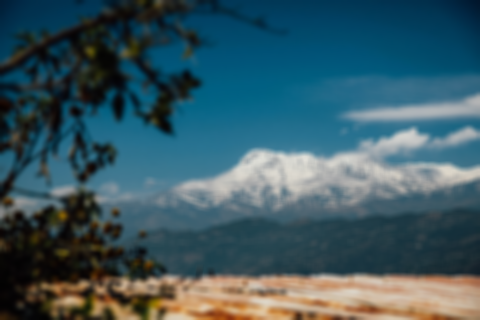

In [60]:
#write you code here:

# read image
src = cv2.imread('/content/Nepal.jpg', cv2.IMREAD_UNCHANGED)

img0 = cv2.resize(src, (480, 320))
 
# apply guassian blur on src image
dst = cv2.GaussianBlur(img0,(7,7),cv2.BORDER_DEFAULT)
 
# display input and output image
cv2_imshow(dst)

## Apply Mean filter to the image and display the result

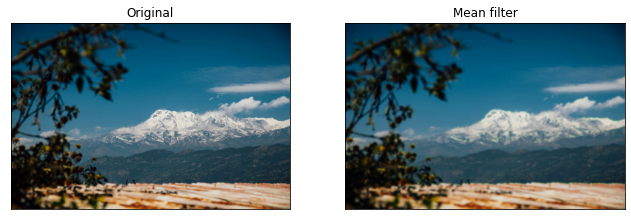

In [61]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline

image = cv2.imread('/content/Nepal.jpg') # reads the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # convert to HSV
figure_size = 9 # the dimension of the x and y axis of the kernal.
new_image = cv2.blur(image,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

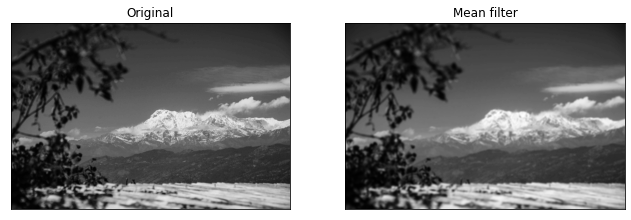

In [62]:
# The image will first be converted to grayscale
image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
figure_size = 9
new_image = cv2.blur(image2,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

## Apply Fourier transform to the image, apply low pass filter to the frequency domain graph, then recover the image to spatial domain and display the result in spatial domain.

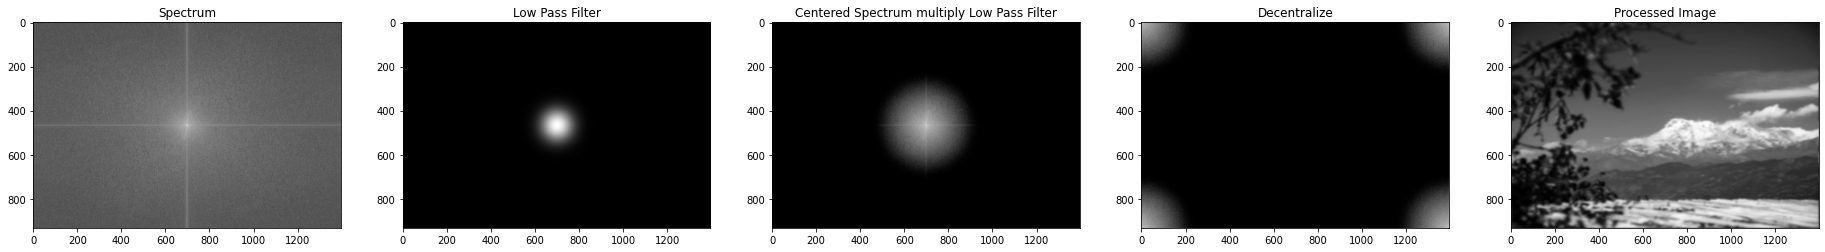

In [63]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

img = cv2.imread("/content/Nepal.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

LowPass = gaussianLP(50,img.shape)
plt.subplot(152), plt.imshow(np.abs(LowPass), "gray"), plt.title("Low Pass Filter")

LowPassCenter = center * gaussianLP(50,img.shape)
plt.subplot(153), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(155), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

plt.show()

## Task 3. Noise removing
In task 3, you need to apply different noise removing methods to an image. Please finish<br>
1. Add salt and pepper noise to an image and display the noisy image;
2. Apply Median filter to the noisy image to remove the noise and display the result;
3. Apply Fourier transform to the noisy image, apply band-pass filter to the frequency domain graph, recover the output to spatial domain and display the result.

## Add salt and pepper noise to an image and display the noisy image

Text(0.5, 1.0, 'Image with salt and pepper noise added (d=0.2)')

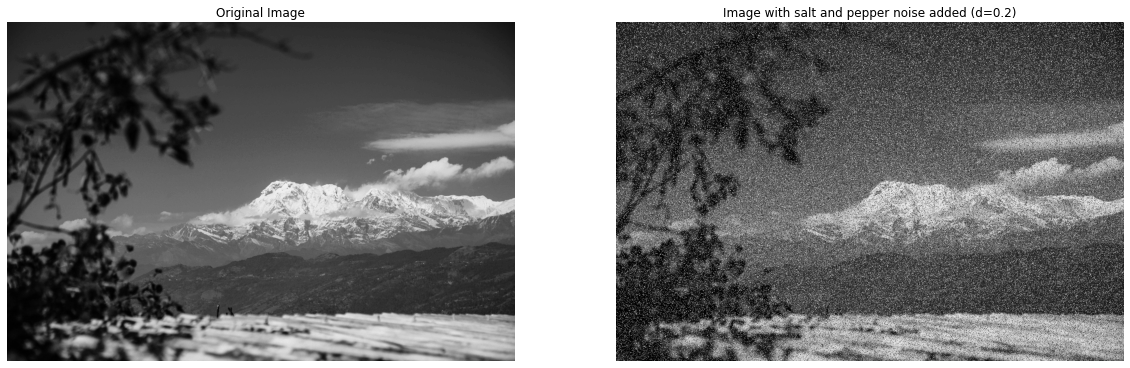

In [64]:
#write your code here:

import random
import copy

# print(np.max(img))    #to use or not to use, that is the question...
# print(np.min(img))

def addnoise(img):
    img2 = copy.deepcopy(img)    #direct img_n = img leads to the original image also being modified
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            k = random.randint(1,10)
            if k == 1:
                img2[i][j] = 0
            elif k == 10:
                img2[i][j] = 255
    return img2


img = cv2.imread("/content/Nepal.jpg", 0)
img2 = addnoise(img)

fig = plt.figure(figsize=(20, 10))

fig.add_subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("Original Image")

fig.add_subplot(1, 2, 2)
plt.imshow(img2, cmap="gray")
plt.axis("off")
plt.title("Image with salt and pepper noise added (d=0.2)")

## Apply Median filter to the noisy image to remove the noise and display the result

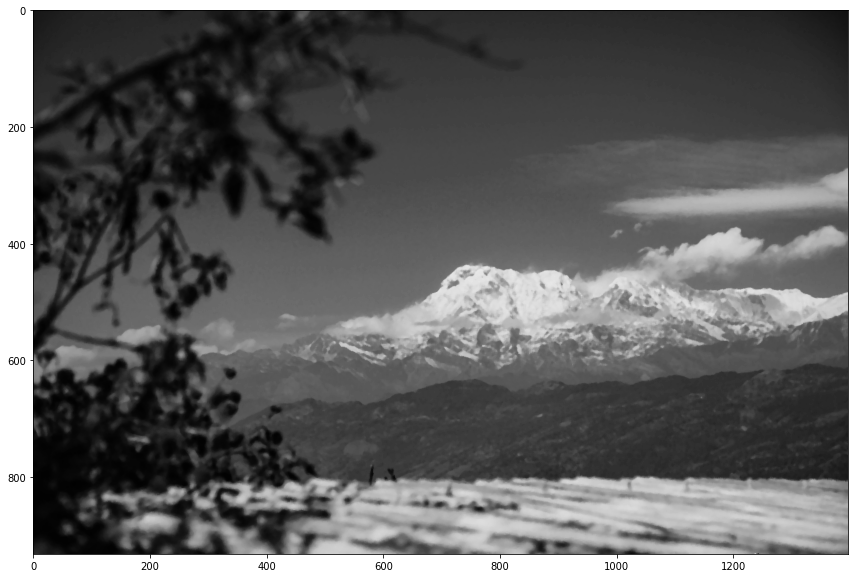

In [65]:
median = cv2.medianBlur(img2, 5)
fig = plt.figure(figsize=(20, 10))
plt.imshow(median, cmap="gray")

## Apply Fourier transform to the noisy image, apply band-pass filter to the frequency domain graph, recover the output to spatial domain and display the result.

(Text(0.5, 1.0, 'After FFT'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

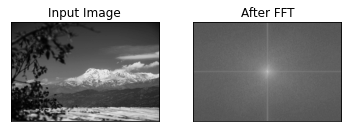

In [66]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/content/Nepal.jpg', 0)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('After FFT'), plt.xticks([]), plt.yticks([])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


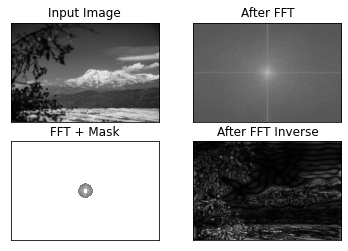

In [67]:
# Band Pass Filter
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.zeros((rows, cols, 2), np.uint8)
r_out = 80
r_in = 10
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = np.logical_and(((x - center[0]) ** 2 + (y - center[1]) ** 2 >= r_in ** 2),
                           ((x - center[0]) ** 2 + (y - center[1]) ** 2 <= r_out ** 2))
mask[mask_area] = 1

# apply mask and inverse DFT
fshift = dft_shift * mask

fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('After FFT'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3), plt.imshow(fshift_mask_mag, cmap='gray')
plt.title('FFT + Mask'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.imshow(img_back, cmap='gray')
plt.title('After FFT Inverse'), plt.xticks([]), plt.yticks([])
plt.show()